## Using Oceanbolt to do count Suez crossings

In this notebook we will go through how you can use the Oceanbolt SDK
to the count number of vessels that have passed through Suez in the recent time period.

In [34]:
#Setup client and import libraries
%load_ext dotenv
%dotenv

from oceanbolt.sdk.client import APIClient
from oceanbolt.sdk.data.tonnage import ZoneChangesTimeseries
from datetime import date

client =ZoneChangesTimeseries(APIClient())

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [35]:
#Zones have been collected from the Zone Visualizer in the Oceanbolt Platform
mediterranean_zones = [11, 18, 21]
red_sea_ag_zones = [17, 35, 96, 8]


#Get south bound crossings
south_bound_crossings = client.get(
    start_date=date(2018,1,1),
    from_zone_id=mediterranean_zones,
    to_zone_id=red_sea_ag_zones,
    frequency="daily",
    group_by="sub_segment"
)

#Get north bound crossings
north_bound_crossings = client.get(
    start_date=date(2018,1,1),
    from_zone_id=red_sea_ag_zones,
    to_zone_id=mediterranean_zones,
    frequency="daily",
    group_by="sub_segment"
)


north_bound_crossings.pivot(
    index="date",
    columns="group",
    values="value"
    ).to_csv("north_bound_crossings.csv")

south_bound_crossings.pivot(
    index="date",
    columns="group",
    values="value"
    ).to_csv("south_bound_crossings.csv")


In [36]:
#Get south bound crossings
south_bound_crossings_weekly = client.get(
    start_date=date(2018,1,1),
    from_zone_id=mediterranean_zones,
    to_zone_id=red_sea_ag_zones,
    frequency="weekly",
)

south_bound_crossings_weekly.tail(5)


,date,value
164,2021-02-22,59
165,2021-03-01,73
166,2021-03-08,56
167,2021-03-15,59
168,2021-03-22,11


<AxesSubplot:title={'center':'Weekly South Bound Suez Crossings (Dry Bulk)'}, xlabel='date'>

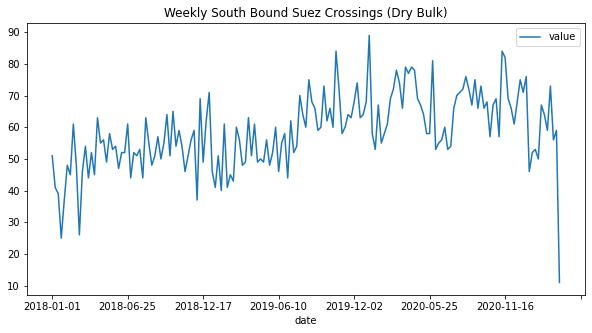

In [37]:
# Let us plot the results
south_bound_crossings_weekly.plot(title="Weekly South Bound Suez Crossings (Dry Bulk)",x='date', figsize=(10,5))


In [38]:
#Get north bound crossings
north_bound_crossings_weekly = client.get(
    start_date=date(2018,1,1),
    from_zone_id=red_sea_ag_zones,
    to_zone_id=mediterranean_zones,
    frequency="weekly",
)
north_bound_crossings_weekly.tail(5)

,date,value
164,2021-02-22,70
165,2021-03-01,52
166,2021-03-08,71
167,2021-03-15,63
168,2021-03-22,7


<AxesSubplot:title={'center':'Weekly North Bound Suez Crossings (Dry Bulk)'}, xlabel='date'>

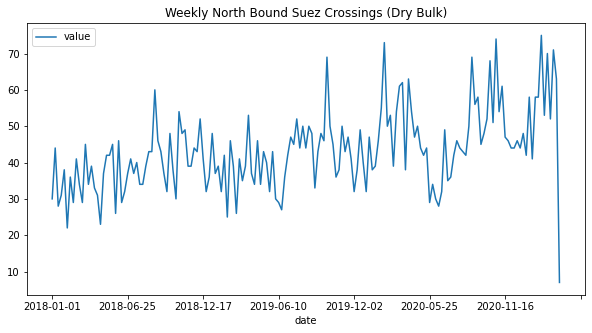

In [39]:
north_bound_crossings_weekly.plot(title="Weekly North Bound Suez Crossings (Dry Bulk)", x='date', figsize=(10,5))